### Objectives
* Gaussian Naive Bayes
* Multinomial Naive Bayes
* Bernoulli's Naive Bayes
* Introduction to Kaggle

<hr>

### Gaussian Naive Bayes
* Default Naive Bayes is all about categorical data.
* If your data in continues & normal distribution, Gaussian Naive Bayes have to be used.
* Naive Bayes is all about classification
* Logistic Regression starts not doing well when dimension of datset is very large.
* Naive Bayes work's very well on high dimensional datasets

In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [6]:
cancer.data.shape

(569, 30)

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

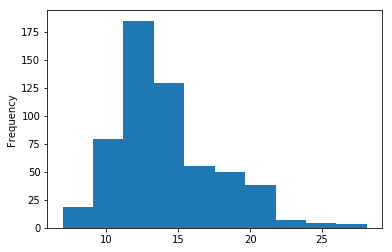

In [15]:
pd.Series(cancer.data[:,0]).plot.hist()

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
trainX, testX, trainY, testY = train_test_split(cancer.data, cancer.target)

In [19]:
gnb = GaussianNB()

In [20]:
gnb.fit(trainX, trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_pred = gnb.predict(testX)

In [23]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[45,  6],
       [ 1, 91]])

In [24]:
gnb.score(testX, testY)

0.951048951048951

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(trainX, trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf.score(testX, testY)

0.972027972027972

In [30]:
feature = pd.DataFrame(cancer.data)

In [31]:
feature.corr()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
9,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [37]:
import numpy as np

In [61]:
features = cancer.data[:,3:19]

In [62]:
features = np.hstack([cancer.data[:,:1], features])

In [63]:
trainX, testX, trainY, testY = train_test_split(features, cancer.target)

In [64]:
gnb = GaussianNB()

In [65]:
gnb.fit(trainX, trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
gnb.score(testX, testY)

0.9300699300699301

### Multinomial Naive Bayes
* Feature are counters or discrete in nature
* Works very well with Text Data

In [67]:
horror_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/horror-train.csv')

In [68]:
horror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


In [69]:
horror_data.sample(5)

,id,text,author
8831,id26541,"Yes, he had followed me in my travels; he had ...",MWS
2951,id09538,The same name the same contour of person the s...,EAP
15289,id27162,Polluted by crimes and torn by the bitterest r...,MWS
18659,id12507,"Let them raise a mound above my lifeless body,...",MWS
18769,id12513,"I trod heaven in my thoughts, now exulting in ...",MWS


In [70]:
horror_data.author.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

### We have to do some text preprocessing here 
* First step tokenizing

In [71]:
from nltk.tokenize import RegexpTokenizer

In [72]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [73]:
tokenizer.tokenize(horror_data.text[0])

['This',
 'process',
 'however',
 'afforded',
 'me',
 'no',
 'means',
 'of',
 'ascertaining',
 'the',
 'dimensions',
 'of',
 'my',
 'dungeon',
 'as',
 'I',
 'might',
 'make',
 'its',
 'circuit',
 'and',
 'return',
 'to',
 'the',
 'point',
 'whence',
 'I',
 'set',
 'out',
 'without',
 'being',
 'aware',
 'of',
 'the',
 'fact',
 'so',
 'perfectly',
 'uniform',
 'seemed',
 'the',
 'wall']

In [76]:
horror_data['text_tokenized'] = horror_data.text.map(lambda t: tokenizer.tokenize(t))

In [77]:
horror_data.sample(5)

,id,text,author,text_tokenized
14779,id11608,"The vegetables in the gardens, the milk and ch...",MWS,"[The, vegetables, in, the, gardens, the, milk,..."
12158,id26933,To all appearance it had been temporarily and ...,EAP,"[To, all, appearance, it, had, been, temporari..."
6445,id06287,Perdita and her child were to remain at Kishan.,MWS,"[Perdita, and, her, child, were, to, remain, a..."
3927,id03986,"""Yet I cannot ask you to renounce your country...",MWS,"[Yet, I, cannot, ask, you, to, renounce, your,..."
6729,id16608,He half felt that he was followed a psychologi...,HPL,"[He, half, felt, that, he, was, followed, a, p..."


* Stemming for finding root words, this helps in reducing the dimension of dataset

In [78]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [80]:
horror_data['text_stemmed'] = horror_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [81]:
horror_data.sample(5)

,id,text,author,text_tokenized,text_stemmed
585,id09912,Gilman mechanically attended classes that morn...,HPL,"[Gilman, mechanically, attended, classes, that...","[gilman, mechan, attend, class, that, morn, bu..."
6171,id09566,"By the utter simplicity, by the nakedness of h...",EAP,"[By, the, utter, simplicity, by, the, nakednes...","[by, the, utter, simplic, by, the, naked, of, ..."
19184,id23908,This time the creaking went along the hall and...,HPL,"[This, time, the, creaking, went, along, the, ...","[this, time, the, creak, went, along, the, hal..."
2908,id14569,"All this I can still remember, though I no lon...",HPL,"[All, this, I, can, still, remember, though, I...","[all, this, i, can, still, rememb, though, i, ..."
19350,id26013,It was said that the swart men who dwelt in Th...,HPL,"[It, was, said, that, the, swart, men, who, dw...","[it, was, said, that, the, swart, men, who, dw..."


* Now, stemmed words need to be converted into sentences

In [83]:
horror_data['text_sent'] = horror_data['text_stemmed'].map(lambda l: ' '.join(l))

In [84]:
horror_data.sample(5)

,id,text,author,text_tokenized,text_stemmed,text_sent
10610,id21810,"She, however, shunned society, and, attaching ...",EAP,"[She, however, shunned, society, and, attachin...","[she, howev, shun, societi, and, attach, herse...",she howev shun societi and attach herself to m...
11553,id20986,"""Suppose you detail,"" said I, ""the particulars...",EAP,"[Suppose, you, detail, said, I, the, particula...","[suppos, you, detail, said, i, the, particular...",suppos you detail said i the particular of you...
6666,id19002,"Lay down your arms, fellow men brethren Pardon...",MWS,"[Lay, down, your, arms, fellow, men, brethren,...","[lay, down, your, arm, fellow, men, brethren, ...",lay down your arm fellow men brethren pardon s...
9120,id26386,An advanced guard gave information of our appr...,MWS,"[An, advanced, guard, gave, information, of, o...","[an, advanc, guard, gave, inform, of, our, app...",an advanc guard gave inform of our approach an...
598,id10417,A paralysis of fear stifled all attempts to cr...,HPL,"[A, paralysis, of, fear, stifled, all, attempt...","[a, paralysi, of, fear, stifl, all, attempt, t...",a paralysi of fear stifl all attempt to cri out


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
cv = CountVectorizer()

In [87]:
feature = cv.fit_transform(horror_data.text_sent)

In [92]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
#cv.vocabulary_

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
mnb = MultinomialNB()

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
trainX, testX, trainY, testY = train_test_split(feature, horror_data.author)

In [100]:
mnb.fit(trainX, trainY)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
mnb.score(testX, testY)

0.8412665985699693

In [102]:
mnb.predict(testX[:1])

array(['EAP'], dtype='<U3')

In [104]:
y_pred = mnb.predict(testX)

In [105]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[1662,  143,  234],
       [ 122, 1125,   92],
       [ 117,   69, 1331]])

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression()

In [108]:
lr.fit(trainX, trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
lr.score(testX, testY)

0.8302349336057201

In [110]:
y_pred = lr.predict(testX)

In [111]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[1744,  124,  171],
       [ 172, 1087,   80],
       [ 198,   86, 1233]])

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=3)

In [115]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [121]:
res = pd.Series(rf.feature_importances_).sort_values(ascending=True)

In [136]:
feature_fs = feature[:,np.where(res > 0)[0]]

In [140]:
trainX, testX, trainY, testY = train_test_split(feature_fs, horror_data.author)

In [141]:
mnb.fit(trainX, trainY)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
mnb.score(testX, testY)

0.8171603677221655

### Bernoulli's Naive Bayes
* BernoulliNB is designed for binary/boolean features.
* If feature data is not binary, BNM will convert into binary
* When most of the columns are True/False

### Assignment : Use adult dataset for Bernoulli's NB